In [11]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.units as munits
import numpy as np

# Forecasting Lapa station temperature

In [12]:
cge = pd.read_csv("../data/processed/lapa2.csv")
cge = cge.dropna()

cge = cge.drop(["uhi", "week", "day_of_month",], axis=1)
cge

,timestamp,precipitation,temperature,relative_humidity,pressure,wind_velocity_x,wind_velocity_y,wind_blow_x,wind_blow_y,uhi_outlier,...,wind_blow_x_outlier_window_24H_min,wind_blow_x_outlier_window_24H_max,wind_blow_y_outlier_window_24H_mean,wind_blow_y_outlier_window_24H_std,wind_blow_y_outlier_window_24H_min,wind_blow_y_outlier_window_24H_max,month_sin,month_cos,hour_sin,hour_cos
36,2016-01-23 02:00:00,0.0,18.939000,83.103833,935.858333,-1.038143,1.008172,-1.998400,2.134965,0,...,0.0,1.0,0.000000,0.000000,0.0,0.0,0.500000,0.866025,0.519584,0.854419
37,2016-01-23 03:00:00,0.0,18.862000,83.799833,935.458333,-0.635033,0.842604,-1.463278,2.119275,0,...,0.0,1.0,0.000000,0.000000,0.0,0.0,0.500000,0.866025,0.730836,0.682553
38,2016-01-23 04:00:00,0.0,18.675667,83.254500,934.948333,-0.860377,1.149583,-1.811513,2.734201,0,...,0.0,1.0,0.000000,0.000000,0.0,0.0,0.500000,0.866025,0.887885,0.460065
39,2016-01-23 05:00:00,0.0,18.592000,83.581167,934.583333,-0.775987,0.512423,-2.267246,1.397408,0,...,0.0,1.0,0.000000,0.000000,0.0,0.0,0.500000,0.866025,0.979084,0.203456
40,2016-01-23 06:00:00,0.0,18.710833,83.717333,934.256667,-0.605909,0.373433,-1.409396,0.968278,0,...,0.0,1.0,0.000000,0.000000,0.0,0.0,0.500000,0.866025,0.997669,-0.068242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,2019-02-18 18:00:00,0.0,27.068333,67.378167,930.448333,0.987694,-1.814244,3.193784,-4.762114,0,...,0.0,0.0,0.041667,0.204124,0.0,1.0,0.866025,0.500000,-0.979084,0.203456
26981,2019-02-18 19:00:00,0.0,26.657000,69.979500,930.051667,0.917986,-0.961140,2.594402,-4.523592,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.866025,0.500000,-0.887885,0.460065
26982,2019-02-18 20:00:00,0.0,26.392000,71.525833,930.355000,0.097844,-0.196218,1.376222,-3.055869,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.866025,0.500000,-0.730836,0.682553
26983,2019-02-18 21:00:00,0.0,25.975667,72.498333,930.805000,0.079571,-0.134955,-0.145668,-0.977395,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.866025,0.500000,-0.519584,0.854419


In [13]:
ts = cge[["timestamp"]]
ts.head()

,timestamp
36,2016-01-23 02:00:00
37,2016-01-23 03:00:00
38,2016-01-23 04:00:00
39,2016-01-23 05:00:00
40,2016-01-23 06:00:00


In [14]:
def make_steps(df, y):
    for i in range(6):
        df[f"{y}_step_{i+1}"] = df[y].shift(-i+1)
    return df

y = make_steps(df=cge[["temperature"]], y="temperature").drop("temperature", axis=1)
y = y.dropna()

y

/tmp/ipykernel_1376/1100420432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{y}_step_{i+1}"] = df[y].shift(-i+1)
/tmp/ipykernel_1376/1100420432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{y}_step_{i+1}"] = df[y].shift(-i+1)
/tmp/ipykernel_1376/1100420432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,temperature_step_1,temperature_step_2,temperature_step_3,temperature_step_4,temperature_step_5,temperature_step_6
37,18.939000,18.862000,18.675667,18.592000,18.710833,18.917333
38,18.862000,18.675667,18.592000,18.710833,18.917333,19.045000
39,18.675667,18.592000,18.710833,18.917333,19.045000,19.244667
40,18.592000,18.710833,18.917333,19.045000,19.244667,19.926167
41,18.710833,18.917333,19.045000,19.244667,19.926167,21.089167
...,...,...,...,...,...,...
26976,25.134833,26.064667,26.781500,26.897333,27.301667,27.068333
26977,26.064667,26.781500,26.897333,27.301667,27.068333,26.657000
26978,26.781500,26.897333,27.301667,27.068333,26.657000,26.392000
26979,26.897333,27.301667,27.068333,26.657000,26.392000,25.975667


In [15]:
X = cge.drop(["timestamp", "precipitation", "temperature", "relative_humidity", "pressure", "wind_velocity_x", "wind_velocity_y", "wind_blow_x", "wind_blow_y"], axis=1)
X = X.loc[y.index.min():y.index.max()]
X

,uhi_outlier,precipitation_outlier,temperature_outlier,relative_humidity_outlier,pressure_outlier,wind_velocity_x_outlier,wind_velocity_y_outlier,wind_blow_x_outlier,wind_blow_y_outlier,month,...,wind_blow_x_outlier_window_24H_min,wind_blow_x_outlier_window_24H_max,wind_blow_y_outlier_window_24H_mean,wind_blow_y_outlier_window_24H_std,wind_blow_y_outlier_window_24H_min,wind_blow_y_outlier_window_24H_max,month_sin,month_cos,hour_sin,hour_cos
37,0,0,0,0,0,0,0,0,0,1,...,0.0,1.0,0.000000,0.000000,0.0,0.0,0.500000,0.866025,0.730836,0.682553
38,0,0,0,0,0,0,0,0,0,1,...,0.0,1.0,0.000000,0.000000,0.0,0.0,0.500000,0.866025,0.887885,0.460065
39,0,0,0,0,0,0,0,0,0,1,...,0.0,1.0,0.000000,0.000000,0.0,0.0,0.500000,0.866025,0.979084,0.203456
40,0,0,0,0,0,0,0,0,0,1,...,0.0,1.0,0.000000,0.000000,0.0,0.0,0.500000,0.866025,0.997669,-0.068242
41,0,0,0,0,0,0,0,0,0,1,...,0.0,1.0,0.000000,0.000000,0.0,0.0,0.500000,0.866025,0.942261,-0.334880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26976,0,0,0,0,0,0,0,0,0,2,...,0.0,0.0,0.125000,0.337832,0.0,1.0,0.866025,0.500000,-0.631088,-0.775711
26977,0,0,0,0,0,0,0,0,0,2,...,0.0,0.0,0.125000,0.337832,0.0,1.0,0.866025,0.500000,-0.816970,-0.576680
26978,0,0,0,0,0,1,0,0,0,2,...,0.0,0.0,0.125000,0.337832,0.0,1.0,0.866025,0.500000,-0.942261,-0.334880
26979,0,0,0,0,0,0,1,0,0,2,...,0.0,0.0,0.083333,0.282330,0.0,1.0,0.866025,0.500000,-0.997669,-0.068242


In [16]:
ts = ts.loc[y.index.min():y.index.max()]
ts

,timestamp
37,2016-01-23 03:00:00
38,2016-01-23 04:00:00
39,2016-01-23 05:00:00
40,2016-01-23 06:00:00
41,2016-01-23 07:00:00
...,...
26976,2019-02-18 14:00:00
26977,2019-02-18 15:00:00
26978,2019-02-18 16:00:00
26979,2019-02-18 17:00:00


In [17]:
# the following code lines are necessary to import custom module
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.models.forecasting import RidgeHyperoptTS, GBHyperoptTS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

from skopt import BayesSearchCV
from skopt.space import Real, Integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# model = RidgeHyperoptTS()
# model = GBHyperoptTS()

# model = RegressorChain(Ridge())
model = RegressorChain(RidgeCV())

# model = RegressorChain(
#     HistGradientBoostingRegressor( 
#         warm_start=True,
#         early_stopping=True,
#         random_state=123
#     )
# )

# parameters = {
#     'estimator__base_estimator__max_depth' : list(np.arange(4,16,2)),
#     'estimator__base_estimator__max_iter': list(np.arange(100,300,50)),
#     'estimator__base_estimator__learning_rate': [0.0001, 0.001, 0.01],
#     'estimator__base_estimator__min_samples_leaf': list(np.arange(20,80,20))
#     }

# parameters = {
#     'estimator__base_estimator__max_depth' : Integer(5, 30),
#     'estimator__base_estimator__max_iter': Integer(100, 300),
#     'estimator__base_estimator__learning_rate': Real(1e-6, 1e-2, prior='log-uniform'),
#     'estimator__base_estimator__min_samples_leaf': Integer(20, 60)
#     }

# pipeline = Pipeline(steps = [
#     ('estimator', RegressorChain(HistGradientBoostingRegressor()))
#     ]
# )

# grid_search_cv = GridSearchCV(
#     estimator=pipeline, 
#     param_grid=parameters,
#     cv=TimeSeriesSplit(n_splits=5), 
# )

# opt = BayesSearchCV(
#     estimator=pipeline, 
#     search_spaces=parameters,
#     cv=TimeSeriesSplit(n_splits=3),
#     n_iter=3,
#     random_state=123
# )

model.fit(X_train, y_train)

# opt.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

# y_fit = pd.DataFrame(grid_search_cv.predict(X_train), index=X_train.index, columns=y.columns)
# y_pred = pd.DataFrame(grid_search_cv.predict(X_test), index=X_test.index, columns=y.columns)

# y_fit = pd.DataFrame(opt.predict(X_train), index=X_train.index, columns=y.columns)
# y_pred = pd.DataFrame(opt.predict(X_test), index=X_test.index, columns=y.columns)

<AxesSubplot: xlabel='timestamp'>

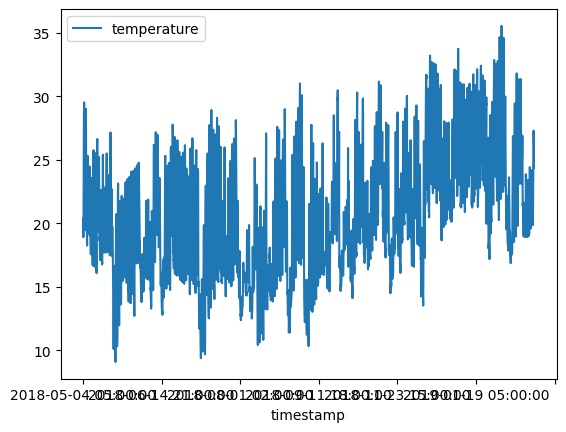

In [18]:
test = cge[X_test.index[0]:X_test.index[-1]][["timestamp", "temperature"]].set_index("timestamp")
test.plot()

In [19]:
test.index = pd.to_datetime(test.index)
test

,temperature
timestamp,
2018-05-04 05:00:00,20.360833
2018-05-04 06:00:00,19.927833
2018-05-04 07:00:00,19.717833
2018-05-04 08:00:00,19.383833
2018-05-04 09:00:00,18.915833
...,...
2019-02-18 18:00:00,27.068333
2019-02-18 19:00:00,26.657000
2019-02-18 20:00:00,26.392000


In [20]:
ts.timestamp = pd.to_datetime(ts.timestamp)
y_pred["timestamp"] = ts[y_pred.index[0]:y_pred.index[-1]]["timestamp"]
y_pred = y_pred.dropna()
y_pred

,temperature_step_1,temperature_step_2,temperature_step_3,temperature_step_4,temperature_step_5,temperature_step_6,timestamp
20008,20.385905,19.796554,19.414603,19.148080,19.250831,19.816554,2018-05-04 06:00:00
20009,19.932881,19.589797,19.391414,19.542599,19.996974,20.990865,2018-05-04 07:00:00
20010,19.689721,19.365438,19.515619,20.054997,21.092991,22.618071,2018-05-04 08:00:00
20011,19.384312,19.480896,19.932123,20.975965,22.474756,23.955286,2018-05-04 09:00:00
20012,18.927438,19.194609,20.304074,21.789522,23.223872,24.488133,2018-05-04 10:00:00
...,...,...,...,...,...,...,...
26976,25.144040,26.197202,26.904336,27.419427,27.534245,26.952538,2019-02-18 14:00:00
26977,26.073145,27.049941,27.865384,28.168106,27.699321,26.754435,2019-02-18 15:00:00
26978,26.781919,27.735570,28.236863,27.890260,27.027424,25.209407,2019-02-18 16:00:00
26979,26.903461,27.558198,27.591141,27.160570,25.574039,24.061217,2019-02-18 17:00:00


/tmp/ipykernel_1376/1111486109.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(9,3))


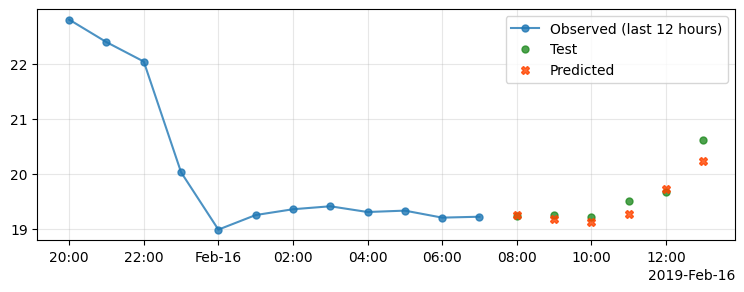

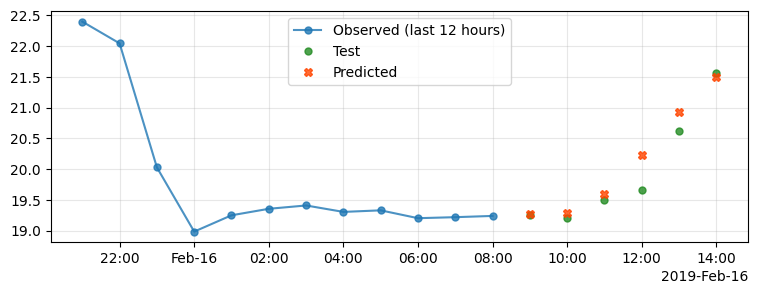

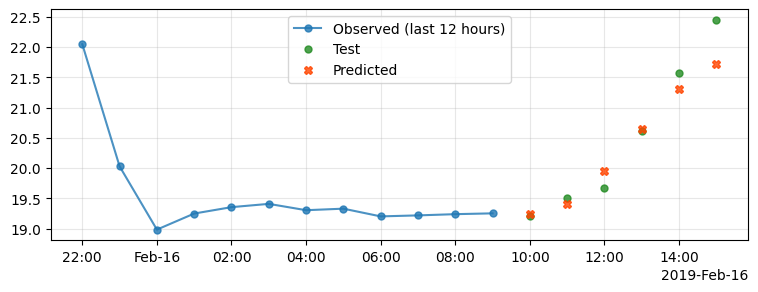

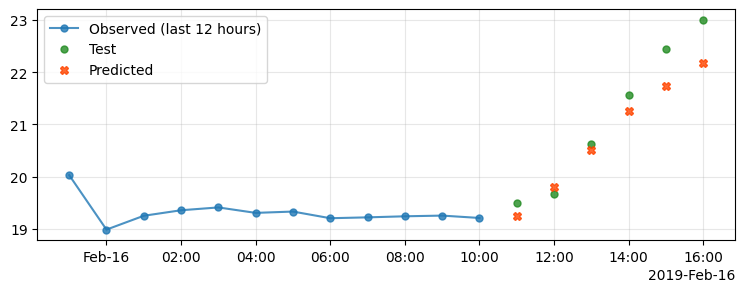

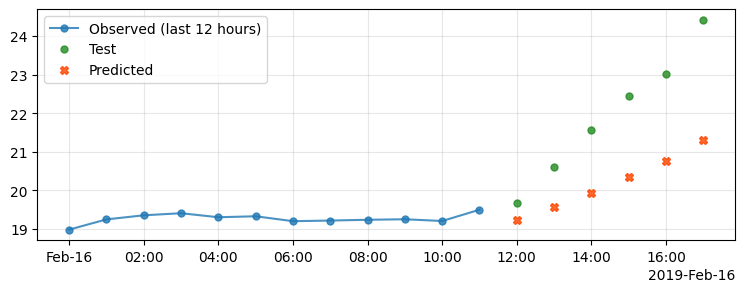

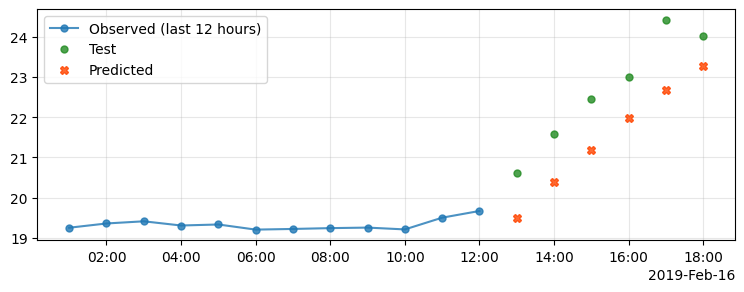

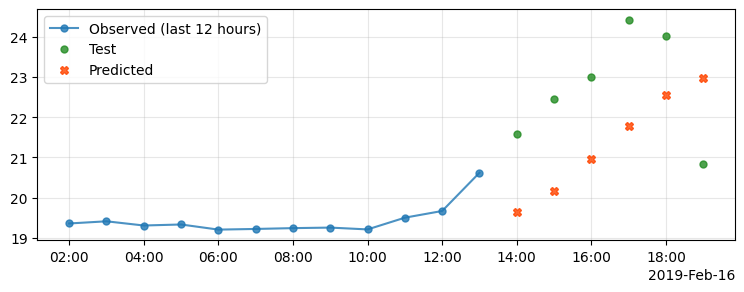

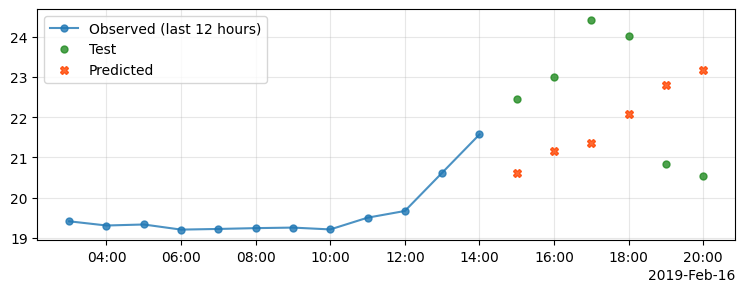

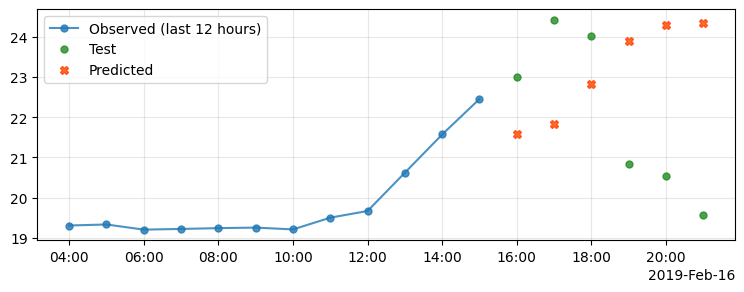

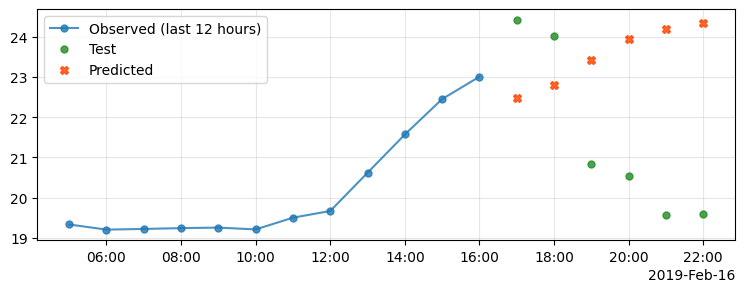

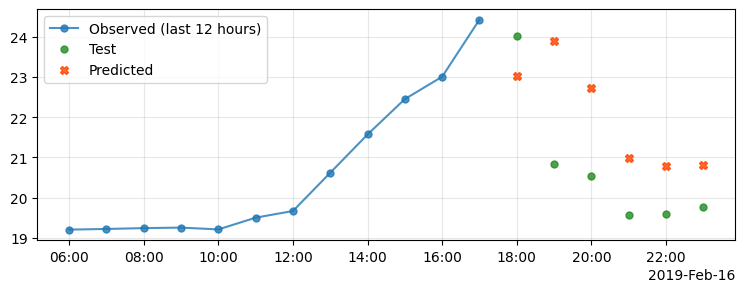

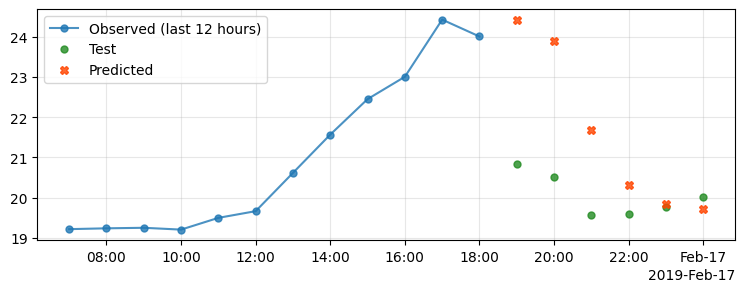

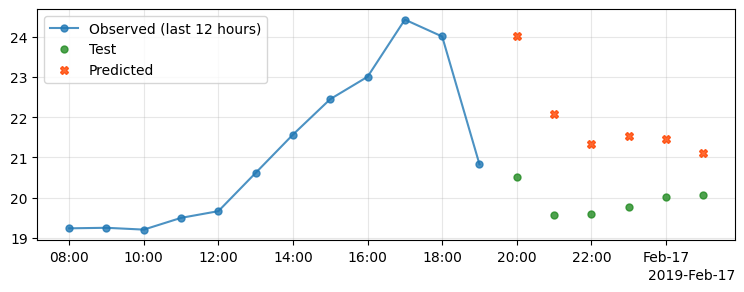

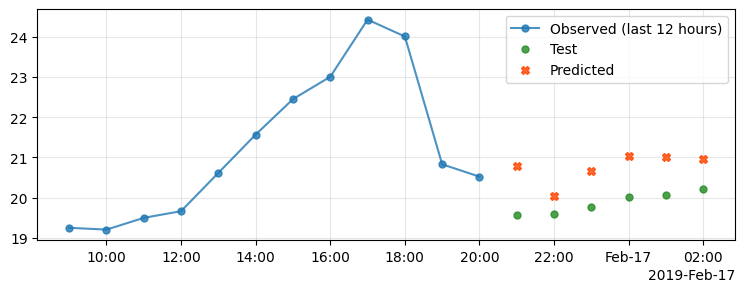

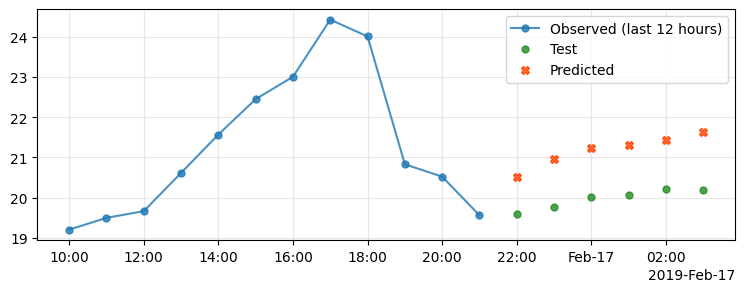

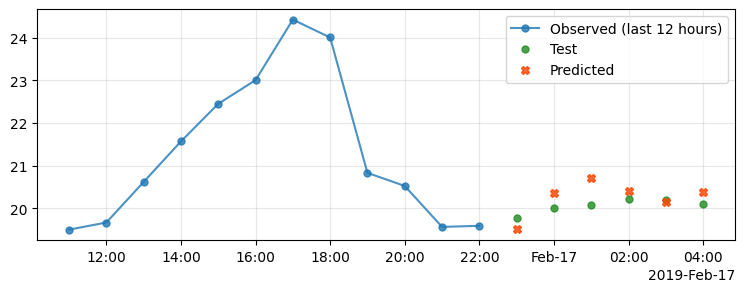

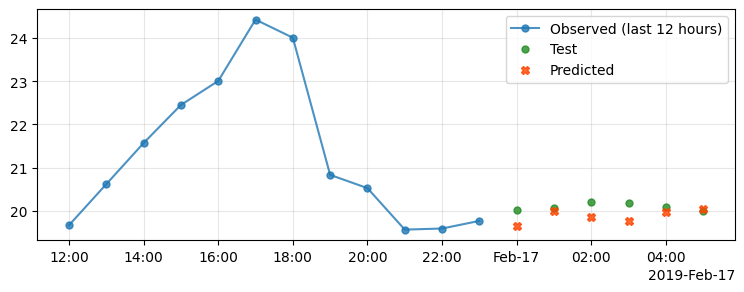

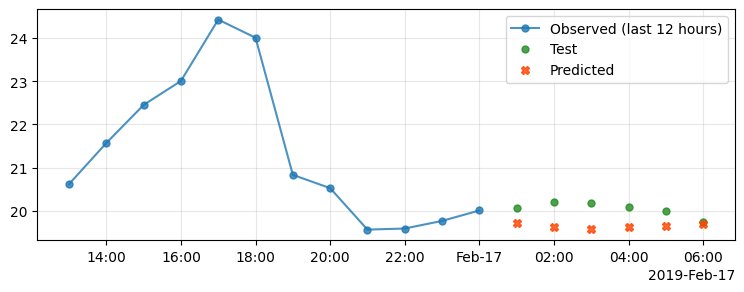

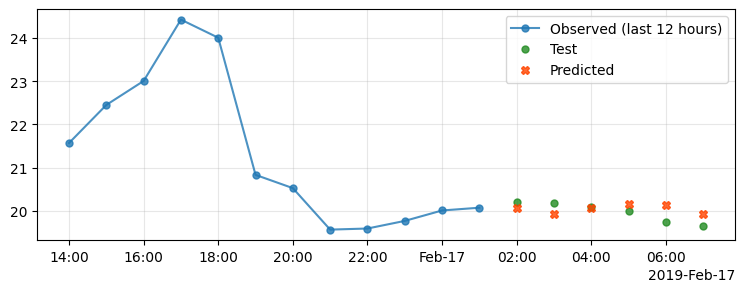

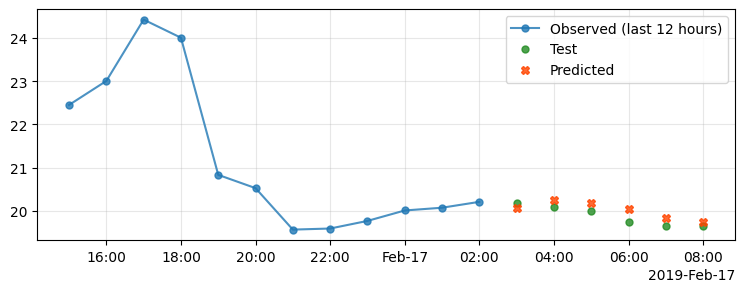

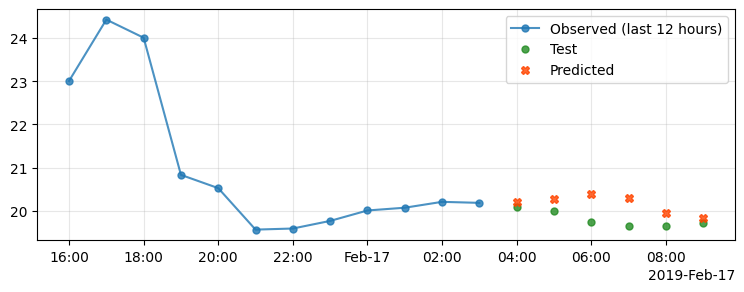

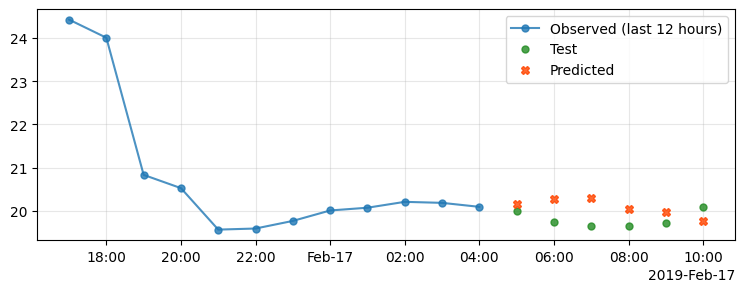

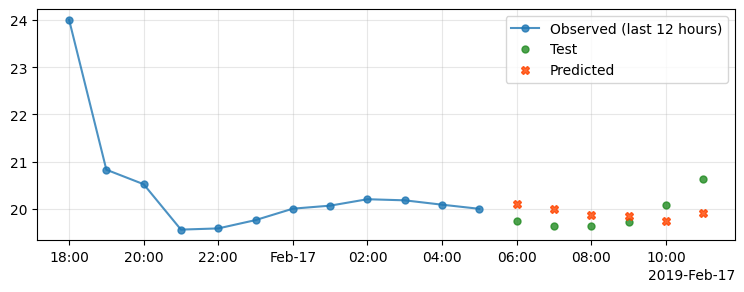

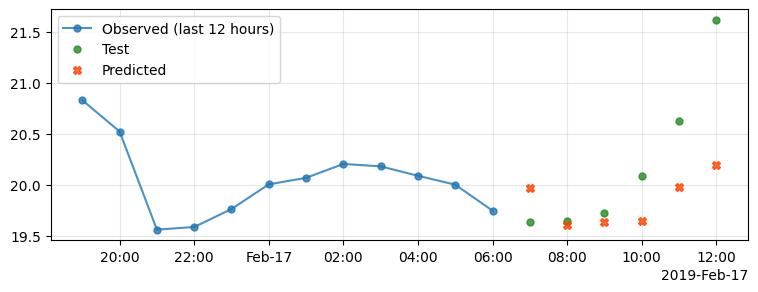

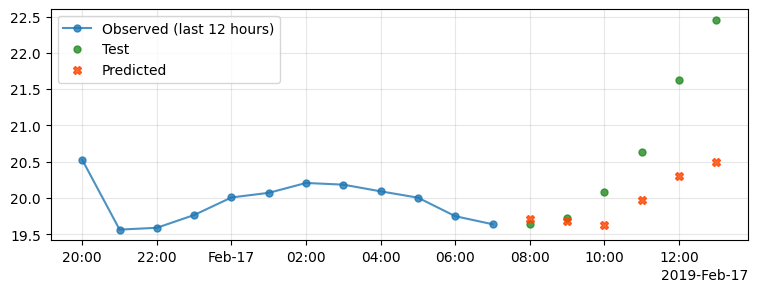

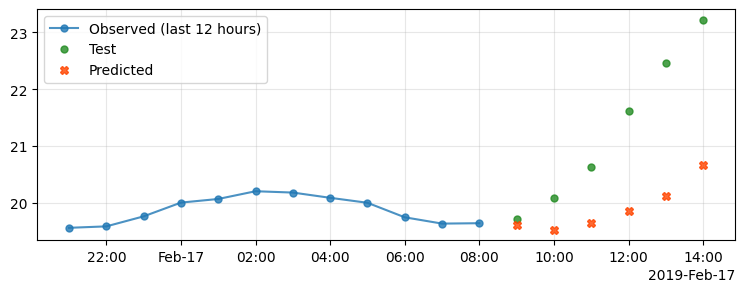

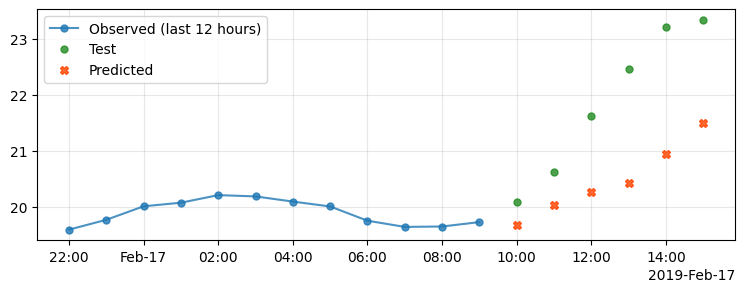

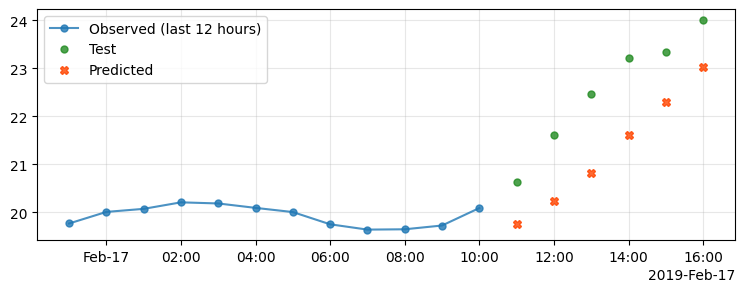

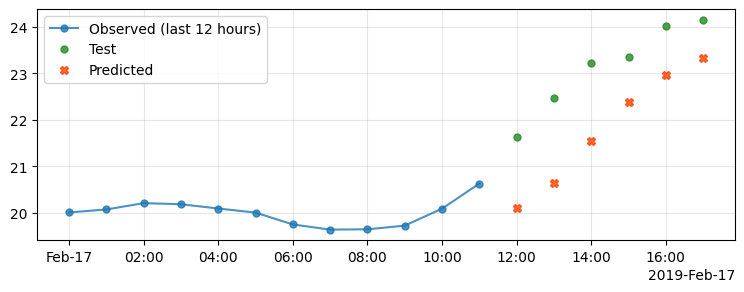

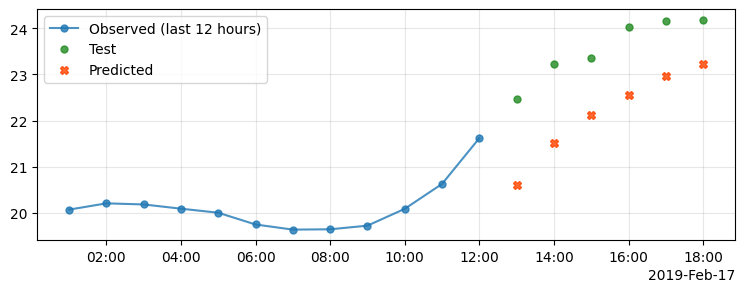

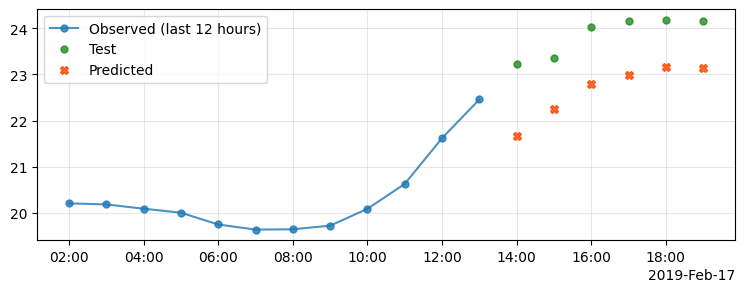

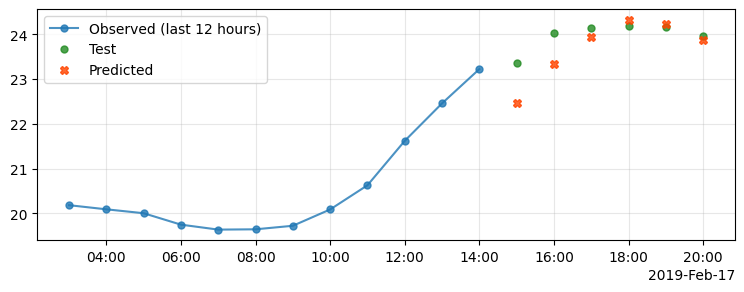

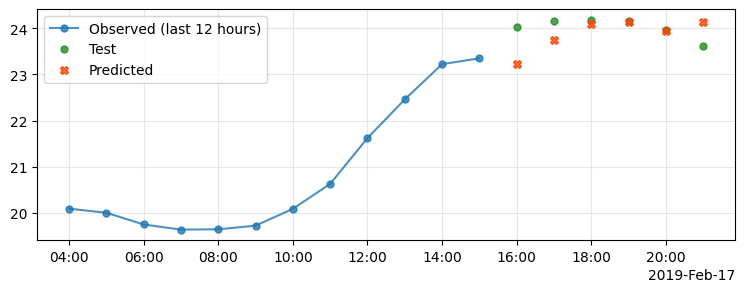

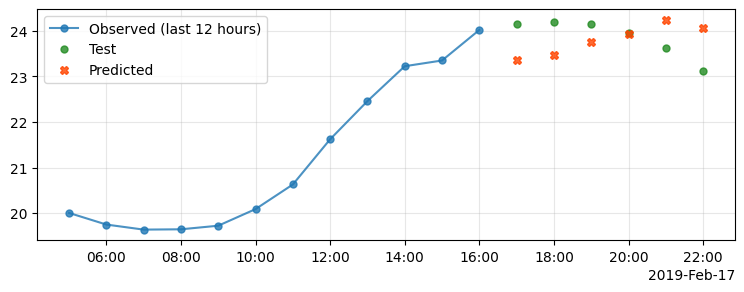

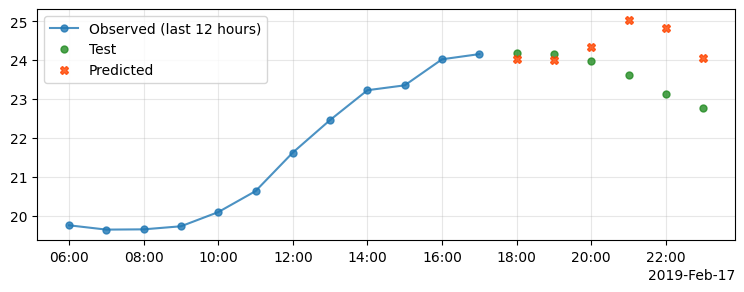

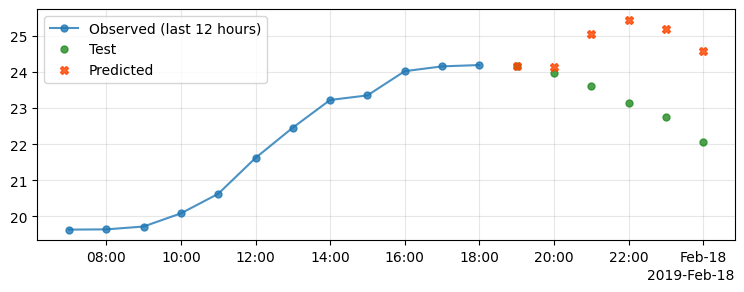

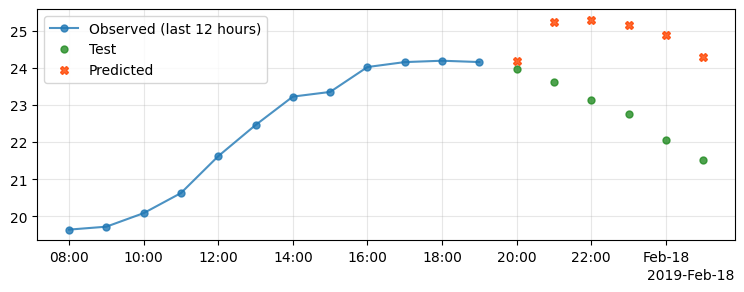

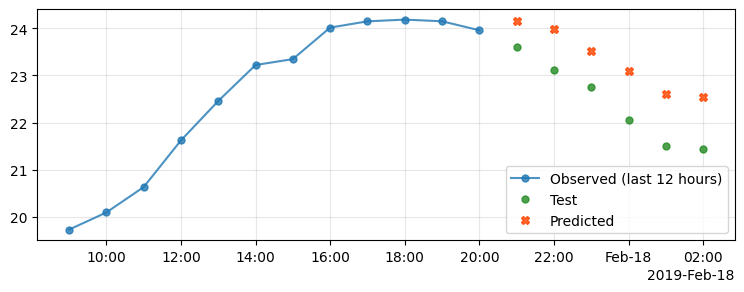

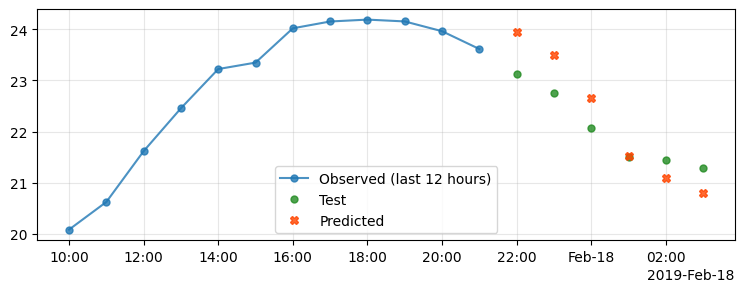

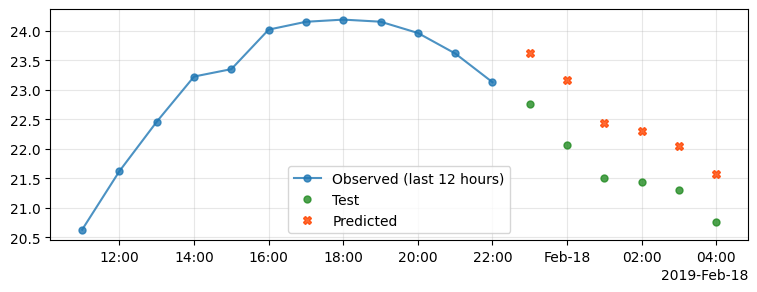

In [21]:
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

for i in y_pred.index[-60:-20]:
    pred = y_pred.loc[[i]]
    start_date = pred.timestamp.unique()[0] + np.timedelta64(1,'h')
    pred = pred.drop("timestamp", axis=1).T
    pred.index = pd.date_range(start=start_date, periods=6, freq="H")
    pred.columns = ["temperature"]

    past_data = 12
    train_plot = test[pred.index[0]-np.timedelta64(past_data,'h'):pred.index[0]-np.timedelta64(1,'h')]
    test_plot = test[pred.index[0]:pred.index[-1]]

    fig, ax = plt.subplots(figsize=(9,3))
    ax.plot(train_plot, label=f"Observed (last {past_data} hours)", marker=".", markersize=10, alpha=0.8)
    ax.plot(test_plot, label="Test", ls="", marker=".", markersize=10, color="forestgreen", alpha=0.8)
    ax.plot(pred, label="Predicted", ls="", marker="X", markersize=6, color="orangered", alpha=0.8)
    # ax.set_xticks(pd.concat([train_plot, test_plot]).reset_index().timestamp)
    ax.legend()
    ax.grid(alpha=0.3)

test_dfs = []
pred_dfs = []
mse = []
for i in y_pred.index:
    pred = y_pred.loc[[i]]
    start_date = pred.timestamp.unique()[0] + np.timedelta64(1,'h')
    pred = pred.drop("timestamp", axis=1).T
    pred.index = pd.date_range(start=start_date, periods=6, freq="H")
    pred.columns = ["temperature"]
    test_plot = test[pred.index[0]:pred.index[-1]]
    try:
        mse.append(mean_squared_error(test_plot, pred, squared=False))
        test_dfs.append(test_plot)
        pred_dfs.append(pred)
    except:
        pass

In [22]:
# plt.figure(dpi=100, figsize=(5,5))
# plt.scatter(y_test, y_pred, alpha=0.4, label='Predictions')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', label='Perfect model', color='red')
# # plt.xlim(y_test.min(), y_test.max())
# # plt.ylim=(y_test.min(), y_test.max())
# plt.xlabel("Observed temp. (°C)")
# plt.ylabel("Predicted temp. (°C)")
# plt.grid(alpha=0.4)
# plt.legend()
# plt.show()

In [23]:
print(f"MSE")
print(f"Mean: {np.round(np.mean(mse), 2)}") 
print(f"Standard deviation: +-{np.round(np.std(mse), 2)}")

MSE
Mean: 1.75
Standard deviation: +-1.21
